In [7]:
%%latex

Recall that the h-polynomial of a polytope P is $h(t) = f_0+f_1(t−1) +· · ·+f_d(t−1)^d$ 
where $f_i=$ number of i-dimensional faces of P. 
Compare the coefficients of these polynomials with 
the values $μ(\hat{0},[n]^j)$ of the Mobius functions of $\Pi^w_{\Gamma_n}$ 


<IPython.core.display.Latex object>

In [40]:
# N=5
# P= graphs.PathGraph(n) 
# adj= P.adjacency_matrix()
# sampmat=adj
    
# subsets=Subsets(list(range(1,N+1))).list()
# print(subsets)
# subsets.remove(subsets[0])
# subsetn=subsets[:]
# marked=[]
# for i,sub in enumerate(subsetn):
#     testblock=list(sub)
#     testblock[:]=[x-1 for x in testblock]
#     testadj=sampmat[testblock,testblock]
#     if disconnected(testadj,len(testblock)):
#         marked.append(sub)
#     else:
#         continue
# for i in marked:
#     subsetn.remove(i)

# subsetn
# graphs.StarGraph(4).adjacency_matrix()

subsets=Subsets(list(range(1,4))).list()
list(range(5))

[0, 1, 2, 3, 4]

In [81]:


def path(N): 
    return graphs.PathGraph(N).adjacency_matrix() 

def star(N):
    if N<4:
        return graphs.PathGraph(N).adjacency_matrix() 

    else:
        return graphs.StarGraph(N-1).adjacency_matrix() 
      
    


def disconnected(AdjMat,b):   #b is the size of of the testblock
    ans= sum(sum(AdjMat))/2
    return ans!=b-1


def tubes(n,AdjMat):
    subsets=Subsets(list(range(n))).list()
    subsets.remove(subsets[0])
    subsetn=subsets[:]
    marked=[]
    for i,sub in enumerate(subsetn):
        testblock=list(sub)
        testadj=AdjMat[testblock,testblock]
        if disconnected(testadj,len(testblock)):
            marked.append(sub)
        else:
            continue
    for i in marked:
        subsetn.remove(i)
    return subsetn[:-1]




def IDG(arg,Adjmat): #short for Induces Disconnected Graph
    testblock=list(arg)
    testblock[:]=[x-1 for x in testblock]
    testadj=Adjmat[testblock,testblock]
    if disconnected(testadj,len(testblock)):
        return True
    else:
        return False


def containment(a,b):
    if len(a) != len(b)-1:
        return False
    
    if not (a).issubset(b):
        return False

    return True    
    




# P= graphs.PathGraph(N) 
# S=graphs.StarGraph(N-1) #the Sage's Star Graph actually graphs N+1 vertices instead of N so I put N-1 here to account for that

# pathadj= P.adjacency_matrix()    #default ordering of rows and columns is from 0 to N
# staradj= S.adjacency_matrix()
# n (tubes+1)  Path graph data
# 3 5
# 4 9
# 5 14
# 6 20
# 7 27
# 8 35
# 9 44


#possible OEIS sequences
## Sum of the integers from 1 to n, excluding the perfect sixth powers.
## a(n) = n*(n+3)/2. 

# n (tubes+1)  star graph data
# 3 5
# 4 10
# 5 14
# 6 20
# 7 27
# 8 35
# 9 44




##########################
##this influences the REST of the program so choose wisely
N=5
##########################

P= graphs.PathGraph(N) 
S=graphs.StarGraph(N-1) #the Sage's Star Graph actually graphs N+1 vertices instead of N so I put N-1 here to account for that




pathadj= P.adjacency_matrix()    #default ordering of rows and columns is from 0 to N
staradj= S.adjacency_matrix()
if N<4:
    staradj=pathadj



# print(len(tubes(N,staradj)))

# print(len(tubes(N,pathadj)))





In [86]:
%%time
pathtubesdata=[]
startubesdata=[]

for i in range(3,13):
    pathtubesdata.append(len(tubes(i,path(i))))
    startubesdata.append(len(tubes(i,star(i))))
    

print("n=3 to 12",pathtubesdata)  ##a(n) = n-1*(n+2)/2 by oeis

print("n=3 to 12",startubesdata)  ##a(n) = 2^(n-1) + n - 2. (row sums of triangles)?


print(tubes(6,path(6)))

# ('n=3 to 12', [5, 9, 14, 20, 27, 35, 44, 54, 65, 77])
# ('n=3 to 12', [5, 10, 19, 36, 69, 134, 263, 520, 1033, 2058])
# CPU times: user 15.1 s, sys: 1.05 s, total: 16.1 s
# Wall time: 19.9 s

('n=3 to 12', [5, 9, 14, 20, 27, 35, 44, 54, 65, 77])
('n=3 to 12', [5, 10, 19, 36, 69, 134, 263, 520, 1033, 2058])
[{0}, {1}, {2}, {3}, {4}, {5}, {0, 1}, {1, 2}, {2, 3}, {3, 4}, {4, 5}, {0, 1, 2}, {1, 2, 3}, {2, 3, 4}, {3, 4, 5}, {0, 1, 2, 3}, {1, 2, 3, 4}, {2, 3, 4, 5}, {0, 1, 2, 3, 4}, {1, 2, 3, 4, 5}]
CPU times: user 14 s, sys: 750 ms, total: 14.7 s
Wall time: 15.8 s


In [63]:
#reminding myself of the set operations in python
# print {1,2,3}|({2,3,4}) #union
# print{1,2,3}&({2,3,4}) #intersection
# print{2,3,4}<=({2,3,4}) #subset
# print{2,3,4}>={2,3,4}
# print {2,3,4}<{2,3,4} #proper subset


#set operations in sage are a little different
# print Set([1,2,3])|Set([2,3,4])




## this only returns the tubings of length 2...
## recursion for pairwise comparison as the tubings get larger?
def tubings(n,Adjmat):
    tubings=[]
    marked=[]
    T = tubes(n,Adjmat)
    print("|T|= %d" %len(T)) 
    set_of_pairs = [(T[p1], T[p2]) for p1 in range(len(T)) for p2 in range(p1+1,len(T))]
    print("number of pairs of T = %d" %len(set_of_pairs)) #equal to len(T) choose 2 as you would expect
    for pair in set_of_pairs:
        if len(pair[0])==n or len(pair[1])==n:
            next
       # print pair,(pair[0]).intersection(pair[1]).is_empty(),len((pair[0])&(pair[1]))==len(pair[0]),(pair[1])&(pair[0]) #best way to debug at the moment is to print pair,condition
        elif ((pair[0]).intersection(pair[1]).is_empty()==False) and (len(pair[0]&pair[1])==len(pair[0]) or len(pair[1]&pair[0])==len(pair[1])): 
            tubings.append(list(pair))
        elif (pair[0]).intersection(pair[1]).is_empty() and IDG(pair[0]|pair[1],Adjmat)==True: ##IDG== True means its not a tube
            tubings.append(list(pair))
        else:
            continue
    #insert recursion here?
            
    return (tubings)


adj1=pathadj
adj2=staradj
tubs=tubings(N,adj1)
tubs2=tubings(N,adj2)
def intersect(lst1, lst2):
    # Use of hybrid method
    lst3 = [value for value in lst1 if value in lst2]
 #   for elm in lst1:
  #      if elm&
    return lst3

#print('experiment',intersect([{1},{3,4}],[{1},{1,2,3,4}]))
#do not count maximum tubes



|T|= 14
number of pairs of T = 91
|T|= 19
number of pairs of T = 171


In [132]:
def tube(n,AdjMat):
    subsets=Subsets(list(range(n))).list()
    subsets.remove(subsets[0])
    subsetn=subsets[:]
    marked=[]
    for i,sub in enumerate(subsetn):
        testblock=list(sub)
        testadj=AdjMat[testblock,testblock]
        if disconnected(testadj,len(testblock)):
            marked.append(sub)
        else:
            continue
    for i in marked:
        subsetn.remove(i)
    return subsetn[:-1]


len(tubes(5,path(5)))

14

In [113]:
%%time
def C(n,r):
    if r>n:
        return 0
    else:
        return (factorial(n))/(factorial(r)*factorial(n-r))
    
    
    
def h(n):
    from math import factorial
    hpoly=[0]*(n+1)
    for i in range(1,n+1):
        hpoly[i]=C(n,i)*C(n,i-1)/(n)
        #try // instead?
    return hpoly[1:]

h(4)



def ht(n):
    from math import factorial
    hpoly=[0]*(n)
    for i in range(n):
        hpoly[i]=C(n,i+1)*C(n,i)/(n)
        #try // instead?
    return hpoly

print(ht(4),h(4))

([1, 6, 6, 1], [1, 6, 6, 1])
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.66 ms


mobius func on {{1}, {2}, {3}, {4}} , {{1, 2, 3, 4}} =-6


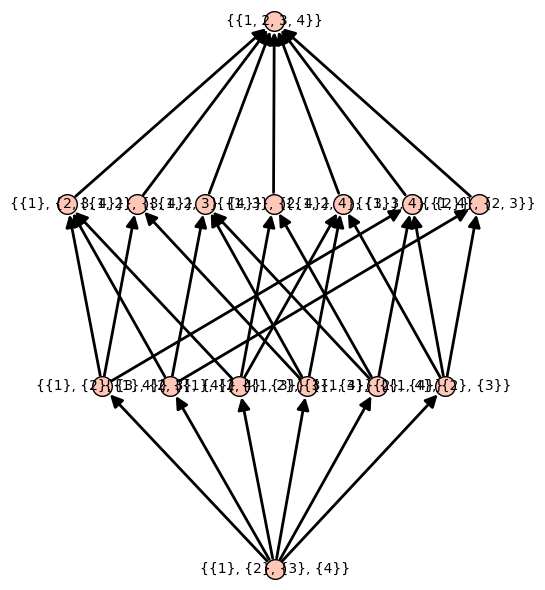

In [87]:

##example of how to write the cover relation for a poset

elms = SetPartitions(4)
def fcn(A, B):
    
    if len(A) != len(B)+1:
        return False

    for a in A:
        if not any(set(a).issubset(b) for b in B):
            return False
    return True

P=Poset((elms, fcn))#, cover_relations=True)
index1=P[0]
index2=P[len(P)-1]
mobfunc=P.moebius_function(index1, index2)
print("mobius func on {} , {} ={}".format(index1,index2,mobfunc))
P.plot()
#(polytopes.simplex().plot())

In [ ]:
##TODO
##Fix tubings fnc to include more than just 2 dimensions in the tubes
##Organize into poset
## plot polytope?

tubes(N,pathadj)
tubings(N,pathadj)


